In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [84]:
# load data
data_raw = pd.read_csv('./rA1_ratings_raw.csv')
# data = data[data['RT'] < 1500]

# reorganize, per stim
data = pd.pivot_table( data_raw, 
                       index = 'Picture', 
                       values = ['Rating','sub2dom','w2b'], 
                       aggfunc = np.mean )

In [86]:
# regression
est = smf.ols(formula='Rating ~ sub2dom * w2b', data=data).fit()
print est.summary()

# MLM
md = smf.mixedlm("Rating ~ sub2dom * w2b", data_raw, groups=data_raw["SubjID"]).fit()
print md.summary()

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     222.0
Date:                Sun, 19 Nov 2017   Prob (F-statistic):           3.50e-79
Time:                        19:29:55   Log-Likelihood:                -142.56
No. Observations:                 338   AIC:                             293.1
Df Residuals:                     334   BIC:                             308.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.6547      0.036    127.706      

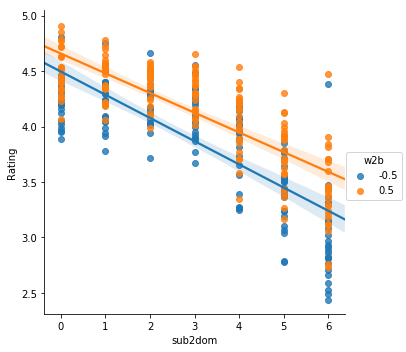

In [76]:
# plot
sns.lmplot(x="sub2dom", y="Rating", hue="w2b", data=data);